In [11]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from argoverse.data_loading.argoverse_forecasting_loader import ArgoverseForecastingLoader
from argoverse.map_representation.map_api import ArgoverseMap
from argoverse.utils.manhattan_search import compute_polygon_bboxes, find_all_polygon_bboxes_overlapping_query_bbox, find_local_polygons
am = ArgoverseMap()


PIT

In [12]:
city_name = 'PIT'
lane_polygons = np.array(am.get_vector_map_lane_polygons(city_name), dtype=object)  # PIT: (4952,)
driveable_areas = np.array(am.get_vector_map_driveable_areas(city_name), dtype=object)  # PIT: (706,)
lane_bboxes = compute_polygon_bboxes(lane_polygons)
da_bboxes = compute_polygon_bboxes(driveable_areas)


In [13]:
# 交叉路口数据
intersection_PIT_id = []
for id in am.build_centerline_index()[city_name]:
    if am.lane_is_in_intersection(id, city_name):
        intersection_PIT_id.append(id)
print("PIT的车道数量：", len(am.build_centerline_index()[city_name]))
print("PIT的交叉路口数量：", len(intersection_PIT_id))

file_path = "/data/fyy/new_prediction/argoverse/intersection_data/PIT/intersection_PIT_id.pickle"
# with open(file_path, "wb") as file:
#     pickle.dump(intersection_PIT_id, file)

PIT的车道数量： 4952
PIT的交叉路口数量： 2043


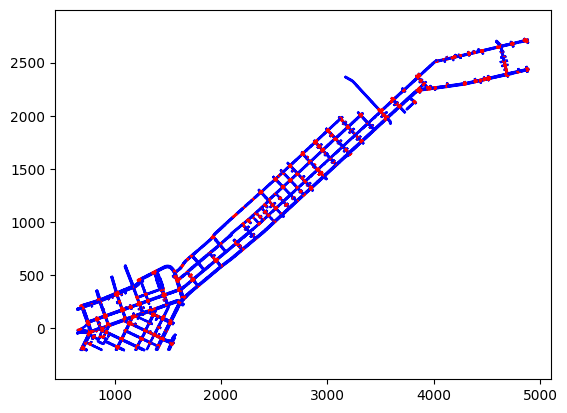

In [14]:
for i, id in enumerate(am.build_centerline_index()[city_name]):
    x, y = lane_polygons[i][:, 0], lane_polygons[i][:, 1]
    if id in intersection_PIT_id:
        plt.plot(x, y, color='red')
    else:
        plt.plot(x, y, color='blue')

plt.axis('equal')
plt.savefig('/data/fyy/new_prediction/argoverse/intersection_data/PIT/lane_polygons_plot.png')

(442.9842593289226, 5101.989954393755, -350.06162873963365, 2869.3241434383267)

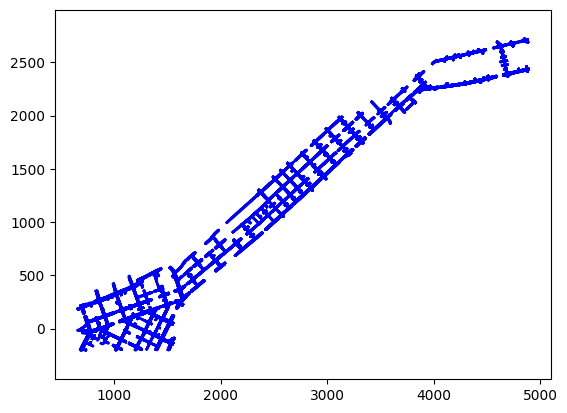

In [15]:
PIT_intersection_lane_and_nbr = dict()

for lane_id in intersection_PIT_id:
    # lane_nbrs = am.dfs(lane_id, city_name, dist=0, threshold=30, extend_along_predecessor=True)
    # lane_nbrs += am.dfs(lane_id, city_name, dist=0, threshold=30, extend_along_predecessor=False)
    polygon = am.get_lane_segment_polygon(lane_id, city_name)
    lane_nbrs = am.get_lane_ids_in_xy_bbox(polygon[0][0], polygon[0][1], city_name, 20)
    lane_nbrs_unique = set(lane_nbrs)
    PIT_intersection_lane_and_nbr[lane_id] = lane_nbrs_unique.copy()  
    # centerline = am.find_local_lane_centerlines(polygon[0][0], polygon[0][1], city_name, 20)
    # for i in range(len(centerline)):
    #     plt.plot(centerline[i][:, 0], centerline[i][:, 1], color='green')

    # lane_nbrs_unique = set()
    # for lane in lane_nbrs:
    #     lane_nbrs_unique.update(lane)
    # lane_nbrs_unique.discard(lane_id)
    # PIT_intersection_lane_and_nbr[lane_id] = lane_nbrs_unique.copy()    # list: [lane_id, lane_nbr1, lane_nbr2, ...]

    for lane in lane_nbrs_unique:
        polygon = am.get_lane_segment_polygon(lane, city_name)
        plt.plot(polygon[:, 0], polygon[:, 1], color='blue')

    # am.draw_lane(lane_id, city_name)
  
plt.axis('equal')


9604856


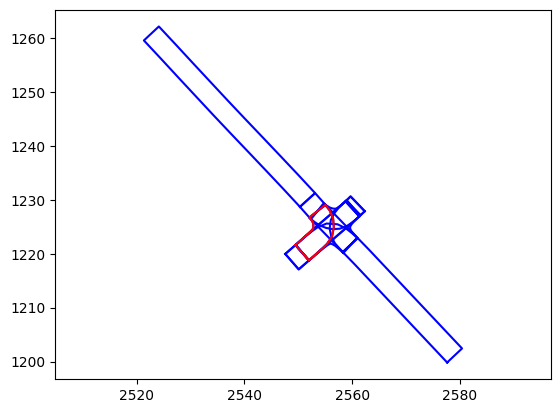

In [16]:
i = 0
lane_id = intersection_PIT_id[i]
for nbr in PIT_intersection_lane_and_nbr[lane_id]:
    polygon = am.get_lane_segment_polygon(nbr, city_name)
    plt.plot(polygon[:, 0], polygon[:, 1], color='blue')

polygon = am.get_lane_segment_polygon(lane_id, city_name)
plt.plot(polygon[:, 0], polygon[:, 1], color='red')
plt.axis('equal')
print(lane_id)


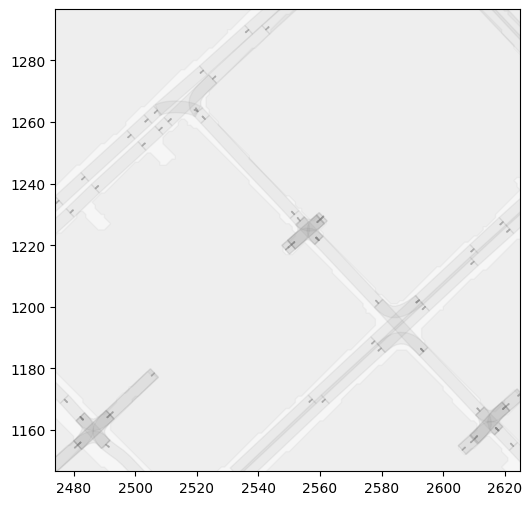

In [17]:
from vis_utils import ArgoMapVisualizer
map_vis = ArgoMapVisualizer()
_, ax = plt.subplots(figsize=(6, 6))
ax.axis('equal')
orig = polygon[0]
map_vis.show_surrounding_elements(ax, city_name, orig)

MIA

MIA的车道数量： 12574
MIA的交叉路口数量： 4248


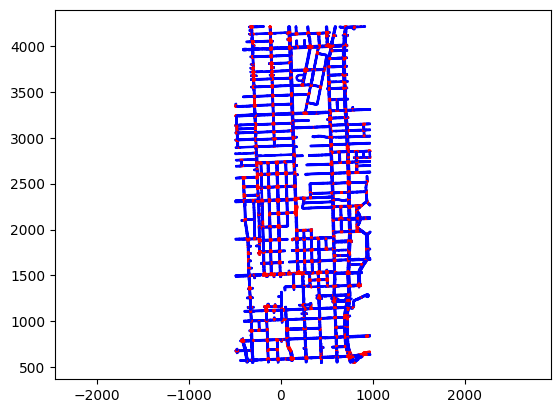

In [ ]:
city_name = 'MIA'
lane_polygons = np.array(am.get_vector_map_lane_polygons(city_name), dtype=object)  # PIT: (4952,)
driveable_areas = np.array(am.get_vector_map_driveable_areas(city_name), dtype=object)  # PIT: (706,)
lane_bboxes = compute_polygon_bboxes(lane_polygons)
da_bboxes = compute_polygon_bboxes(driveable_areas)

# 交叉路口数据
intersection_MIA_id = []
for id in am.build_centerline_index()[city_name]:
    if am.lane_is_in_intersection(id, city_name):
        intersection_MIA_id.append(id)
print("MIA的车道数量：", len(am.build_centerline_index()[city_name]))
print("MIA的交叉路口数量：", len(intersection_MIA_id))

file_path = "/data/fyy/new_prediction/argoverse/intersection_data/MIA/intersection_MIA_id.pickle"
with open(file_path, "wb") as file:
    pickle.dump(intersection_MIA_id, file)

import matplotlib.pyplot as plt
num = 0
for i, id in enumerate(am.build_centerline_index()[city_name]):
    x, y = lane_polygons[i][:, 0], lane_polygons[i][:, 1]
    if id in intersection_MIA_id:
        plt.plot(x, y, color='red')
    else:
        plt.plot(x, y, color='blue')

plt.axis('equal')
plt.savefig('/data/fyy/new_prediction/argoverse/intersection_data/MIA/lane_polygons_plot.png')